#### 뇌에는 수많은 뉴런들이 있고, 데이터를 이 뉴런들을 통해 전달
#### 뉴런 : Graph / 뉴런안에있는데이터 : tensor
#### 미리 세팅해놓고 sess.run을 통해서 실제 프로그램을 작동하는 것이 tensorflow 방식

In [1]:
import tensorflow as tf

In [2]:
x = tf.constant(10)
y = tf.constant(5)
z = x + y

sess = tf.Session()
sess.run(z)

15

### Placehoder
###### 변수의 타입을 미리 설정해놓고 필요한 변수를 나중에 받아서 실행
###### 신경망을 구현하기 위해서 input 노드(feature)와 output 노드(결과)를 설계 , 중간에 hidden 노드를 생성하고 튜닝해서 output노드를 최적화

In [5]:
# 실수형에 텐서의 구조가 2차월 배열(행렬)로 [2,3]의 행렬 모습을 세팅
a = tf.placeholder(tf.float32,[2,3])
print(a)

Tensor("Placeholder_2:0", shape=(2, 3), dtype=float32)


In [6]:
# Input Node를 설계 / 열:2, 행4개의 행렬 구조
I = tf.placeholder(tf.float32, [2, 4])
i = [[1,2,3,4],[5,6,7,8]]
 
# 가중치를 설계 / 열:4, 행2개의 행렬 구조
W = tf.placeholder(tf.float32, [4, 2])
w = [[1,1],[2,2],[3,3],[4,4]]
 
node = tf.matmul(I, W) # 행렬곱
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
print(sess.run(node, feed_dict={I:i, W:w}))

[[30. 30.]
 [70. 70.]]


### Variable
###### 값이 계속 변하며 그 값을 계속 세팅한다면 변수
###### 일반적으로 W를 예측하는 것이 핵심이므로 변수로 선언해야한다. 

In [9]:
# Input Node를 설계 / 행:2, 열4개의 행렬 구조
I = tf.placeholder(tf.float32, [2, 4])
i = [[1, 2, 3, 4], [5, 6, 7, 8]]
 
# 기존의 플레이스 홀더에서 변수형으로 변환
# 0~1 사이의 데이터를 행:4, 열2개로 선언하였습니다
W = tf.Variable(tf.random_normal([4, 2]))
 
# Input 데이터와 Weight를 행렬곱 수행
node = tf.matmul(I, W)
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
print(sess.run(node, feed_dict={I: i}))

[[-11.46116     2.5686116]
 [-27.769272    7.6574173]]


#### 신경망 : 몇 개의 Feature(특징)와 몇개의 노드, 그리고 몇개의 Output으로 되어 있는지, 회귀인지 분류인지 등등 정도만 정의하면 텐서플로우가 알아서 다 돌아간다

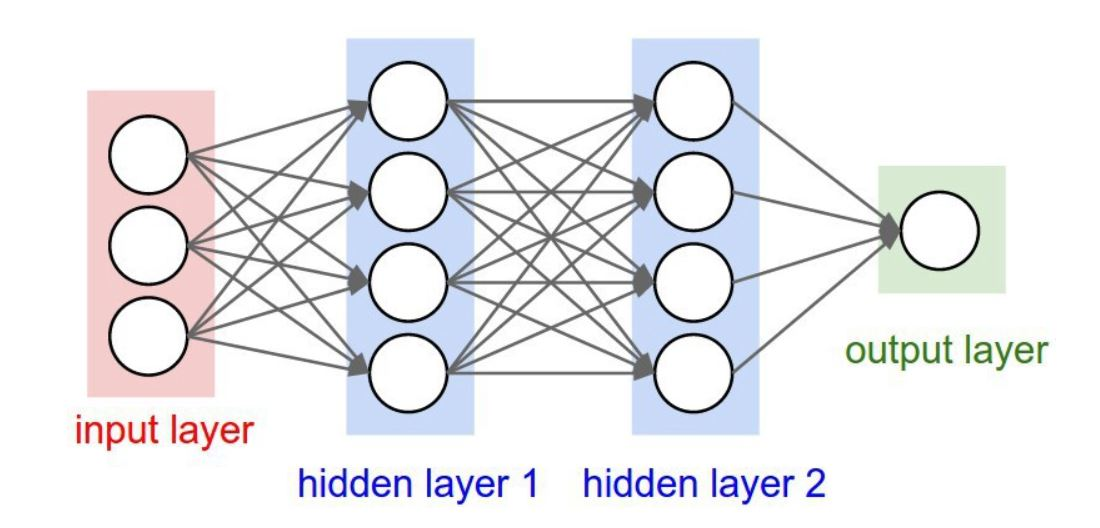
##### 3개의 Feature로 이루어진 input 값을 2개의 히든노드를 거쳐 한개의 값으로 출력되는 구조

In [11]:
# input값의 Feature가 3개로 되어 있기 때문에 가중치의 행렬 구조는 행 3개
# 가중치가 열 2개로 되어 있기 때문에 input의 행 개수과 마지막 weight의 열 2개의 구조로 출력

# X라는 input 값을 placeholder로 세팅, 열만 3개
X = tf.placeholder(tf.float32, [None, 3])
 
# X placeholder에 넣을 데이터 세팅
input = [[1,2,3],[4,5,6]]
 
# 가중치 변수에 [3,2] 구조로 랜덤값을 넣는다
W = tf.Variable(tf.random_normal([3,2]))
 
# 편향변수에 [2,1] 구조로 랜덤값을 넣는다
b = tf.Variable(tf.random_normal([2,1]))
 
# Input값과 가중치를 곱하고, 편향값을 더한값을 hypothesis
hypothesis = tf.matmul(X,W) + b
 
# 텐서플로우 시작
sess = tf.Session()
 
# 정의한 변수들 초기화
sess.run(tf.global_variables_initializer())
 
# input값 출력
print("============== INPUT ==============")
print(input)
 
# 가충치값 출력
print("============== W ==============")
print(sess.run(W))
 
# 편향값 출력
print("============== b ==============")
print(sess.run(b))
 
# 최종결과
print("============== hypothesis ==============")
print(sess.run(hypothesis, feed_dict={X: input}))

============== INPUT ==============
[[1, 2, 3], [4, 5, 6]]
============== W ==============
[[ 1.1157843  -1.2411525 ]
 [-1.1358593   0.95479184]
 [-1.5562757  -1.365639  ]]
============== b ==============
[[-0.69581157]
 [ 0.13888405]]
============== hypothesis ==============
[[ -6.520573   -4.1242976]
 [-10.41493    -8.245602 ]]
